In [23]:
import pandas as pd
titanic = pd.read_csv('/Titanic-Dataset.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
print("First 5 rows:")
display(titanic.head())
print("\nDataset info:")
titanic.info()


First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# New Section

In [25]:
titanic['age_ffill'] = titanic['Age'].fillna(method='ffill')
titanic['age_bfill'] = titanic['Age'].fillna(method='bfill')
titanic['Age'] = titanic['Age'].fillna(method='ffill')

print(f"Missing values in 'Age' after fill: {titanic['Age'].isnull().sum()}")

Missing values in 'Age' after fill: 0


/tmp/ipython-input-25-4068304896.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['age_ffill'] = titanic['Age'].fillna(method='ffill')
/tmp/ipython-input-25-4068304896.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['age_bfill'] = titanic['Age'].fillna(method='bfill')
/tmp/ipython-input-25-4068304896.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['Age'] = titanic['Age'].fillna(method='ffill')


In [26]:
titanic['deck'] = titanic['Cabin'].astype(str).str[0]
titanic['deck'] = titanic['deck'].fillna('unknown')
print(titanic['deck'].unique())

['n' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [27]:
print(titanic.duplicated().sum())
titanic = titanic.drop_duplicates()
print(titanic.shape)


0
(891, 15)


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic['sex_encoded'] = le.fit_transform(titanic['Sex'])

print(titanic[['Sex', 'sex_encoded']].head())

      Sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic['fare_scaled'] = scaler.fit_transform(titanic[['Fare']])

print(titanic[['Fare', 'fare_scaled']].head())

      Fare  fare_scaled
0   7.2500    -0.502445
1  71.2833     0.786845
2   7.9250    -0.488854
3  53.1000     0.420730
4   8.0500    -0.486337


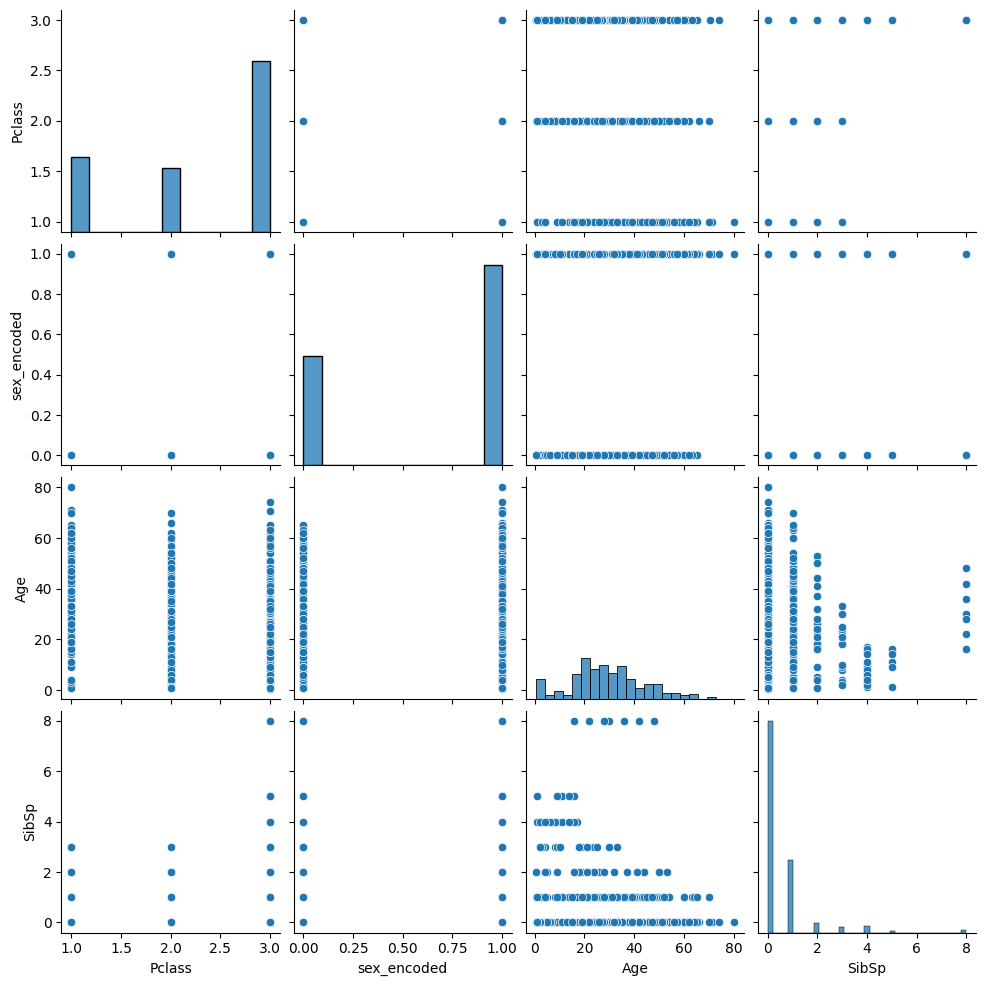

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(titanic[['Pclass', 'sex_encoded', 'Age', 'SibSp']])
plt.show()

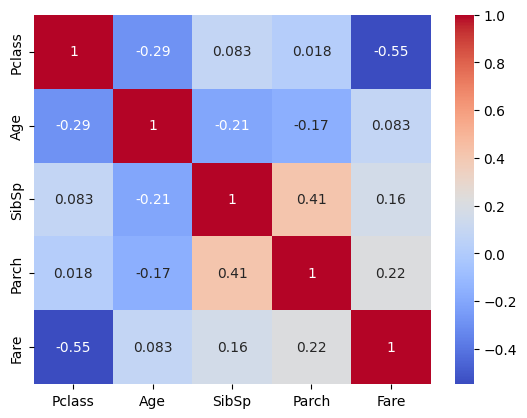

In [31]:
corr_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = titanic[corr_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()